<a href="https://colab.research.google.com/github/Mihaja359/Data-science-/blob/regression/Regression_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.55k/1.55k [00:00<00:00, 2.37MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [7]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [8]:
# Ã‰tape 2 : Nettoyage et prÃ©traitement
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Charger les donnÃ©es
ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)

# Ajouter la variable cible : MedHouseVal
df['MedHouseVal'] = ds.target

# VÃ©rifier les types de donnÃ©es
print("Types de donnÃ©es :\n")
print(df.dtypes)

# VÃ©rifier les valeurs manquantes
print("\nValeurs manquantes :\n")
print(df.isnull().sum())

# Statistiques de base
print("\nStatistiques descriptives :\n")
print(df.describe())


Types de donnÃ©es :

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Valeurs manquantes :

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistiques descriptives :

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1

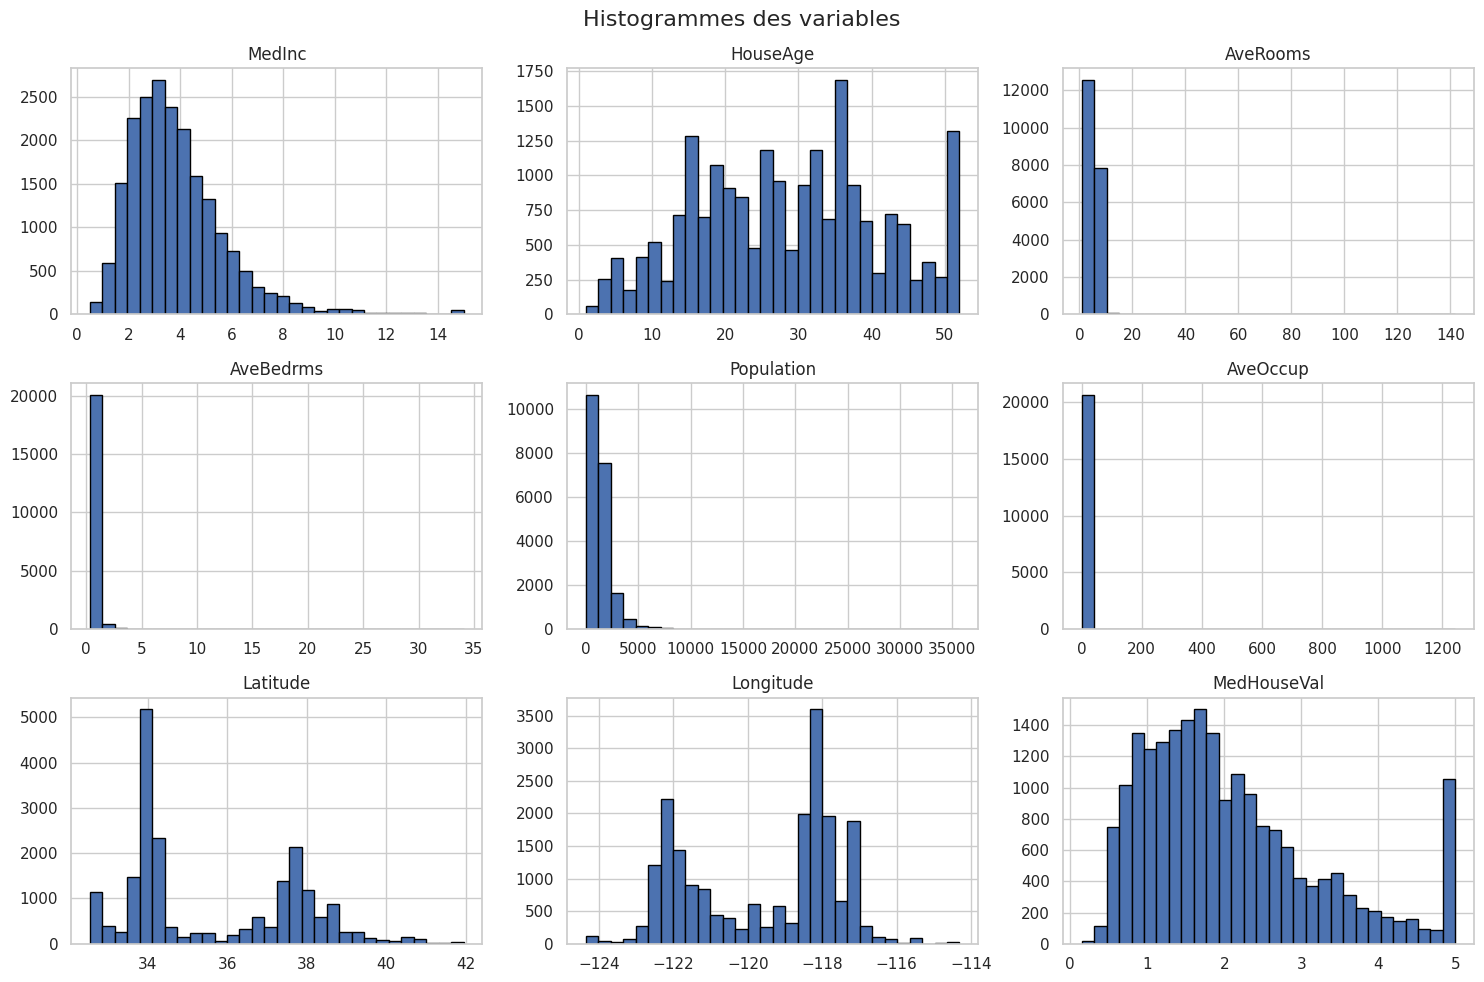

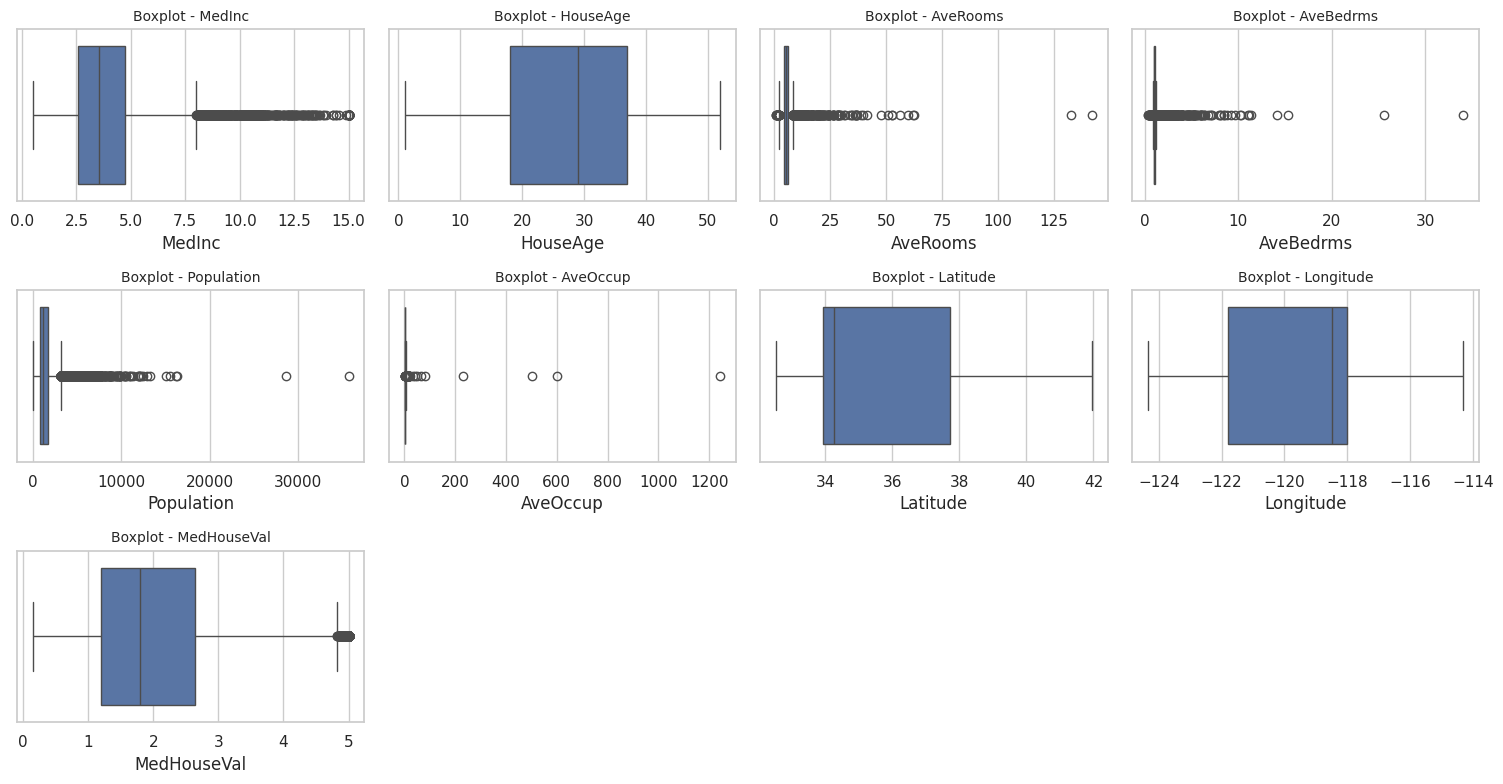

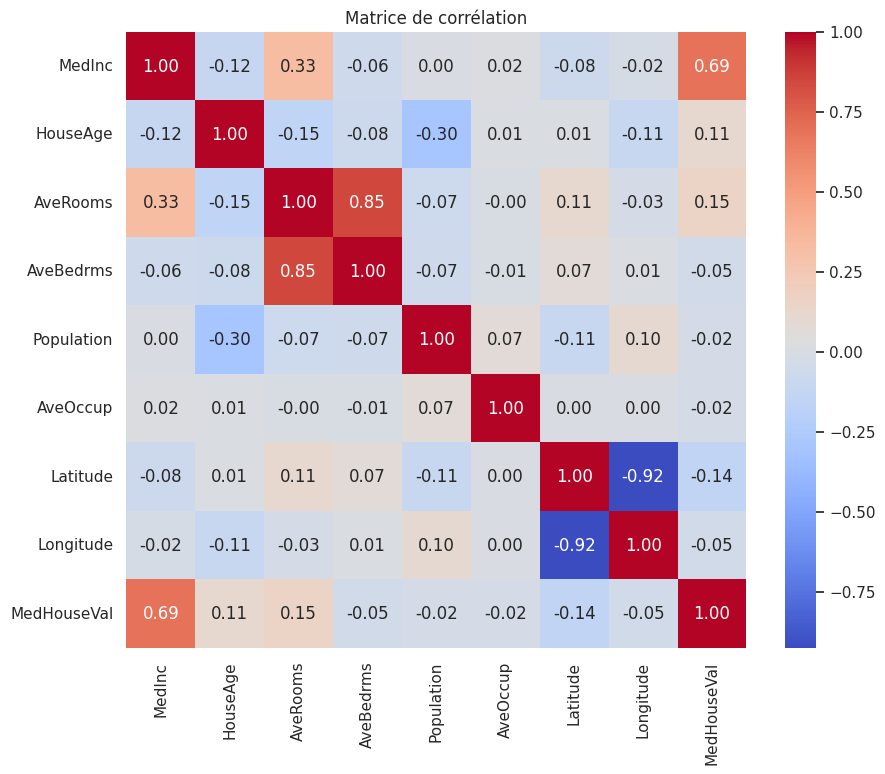

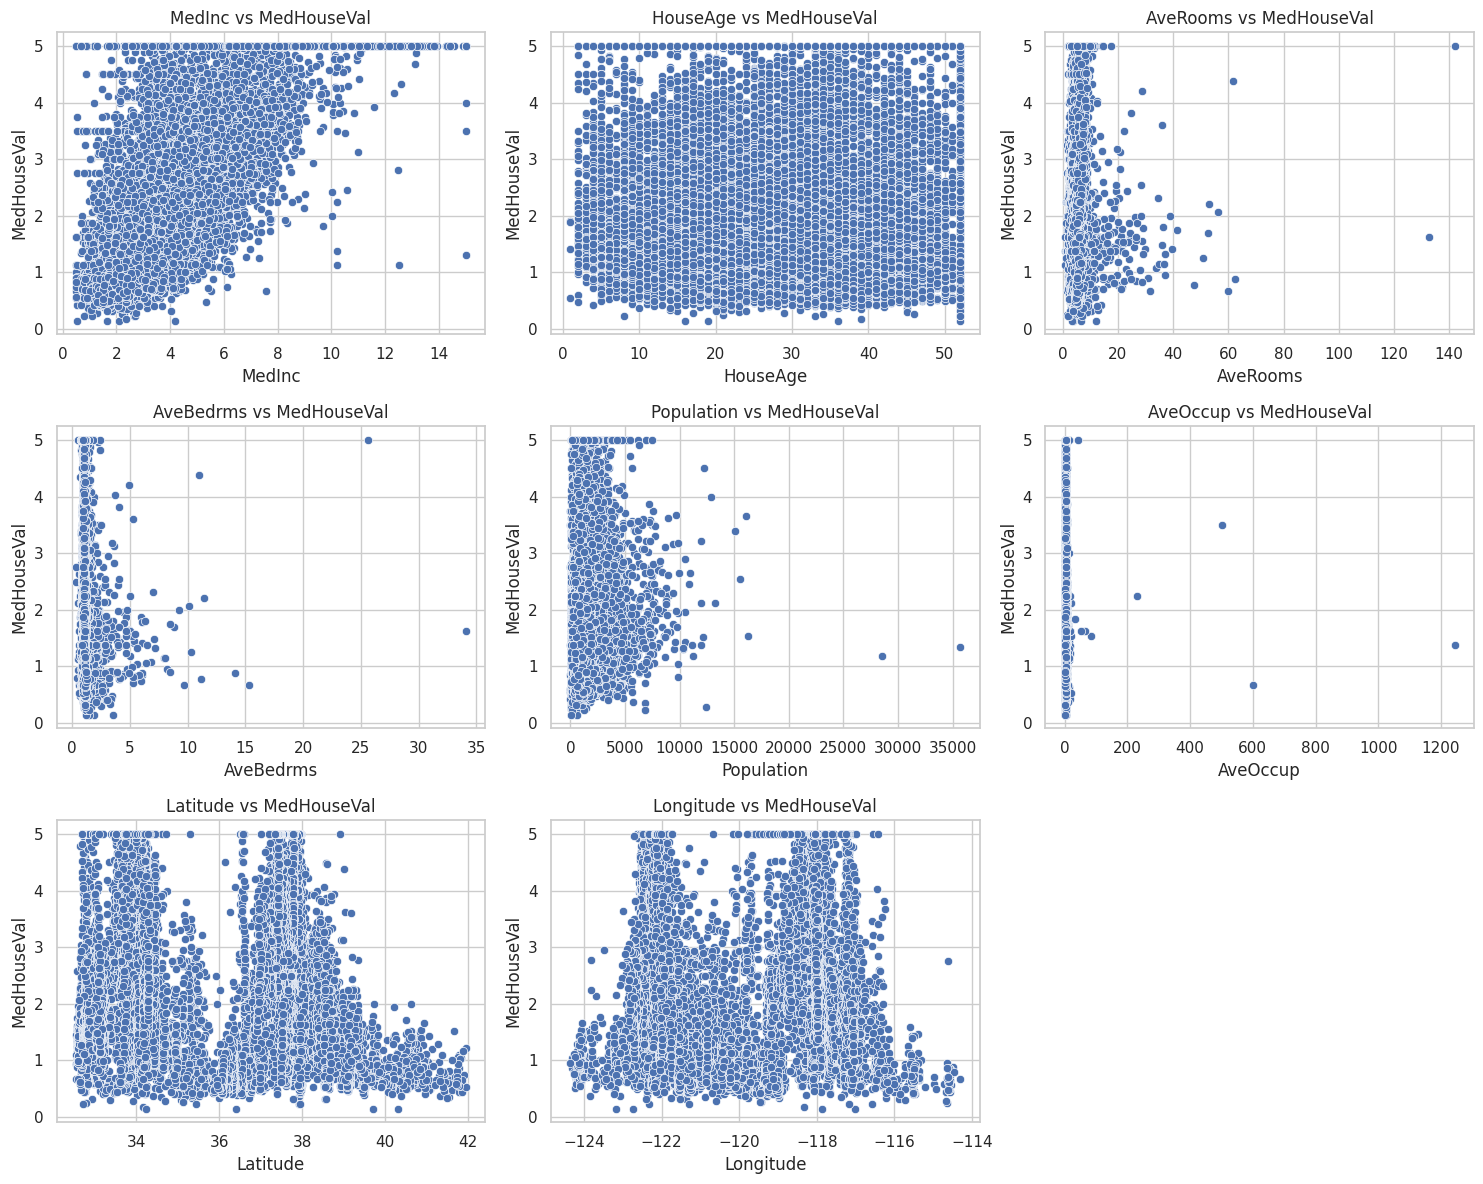

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# DÃ©finir le style
sns.set(style="whitegrid")

# 1. Histogrammes de toutes les variables
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogrammes des variables", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplots pour dÃ©tecter les outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Matrice de corrÃ©lation
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrÃ©lation")
plt.show()

# 4. Scatter-plots par rapport Ã  la variable cible
plt.figure(figsize=(15, 12))
for i, feature in enumerate(df.columns[:-1]):  # on exclut MedHouseVal
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['MedHouseVal'])
    plt.title(f"{feature} vs MedHouseVal")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Variables explicatives (features) et cible
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Ã‰tape 1 : Split en 80% train_val et 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Ã‰tape 2 : Split des 80% restants en 60% train et 20% val (donc 60/20/20 au total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# VÃ©rification des dimensions
print("Taille du jeu d'entraÃ®nement :", X_train.shape)
print("Taille du jeu de validation :", X_val.shape)
print("Taille du jeu de test       :", X_test.shape)


Taille du jeu d'entraÃ®nement : (12384, 8)
Taille du jeu de validation : (4128, 8)
Taille du jeu de test       : (4128, 8)


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer le scaler sur les donnÃ©es d'entraÃ®nement
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la mÃªme transformation sur validation et test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialiser et entraÃ®ner le modÃ¨le
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# PrÃ©dictions sur le set de validation
y_val_pred = lr.predict(X_val_scaled)

# Ã‰valuation
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("RÃ©gression LinÃ©aire - RÃ©sultats sur le jeu de validation :")
print(f"ðŸ“‰ MSE : {mse:.4f}")
print(f"ðŸ“‰ MAE : {mae:.4f}")
print(f"ðŸ“ˆ RÂ²  : {r2:.4f}")


RÃ©gression LinÃ©aire - RÃ©sultats sur le jeu de validation :
ðŸ“‰ MSE : 0.5297
ðŸ“‰ MAE : 0.5333
ðŸ“ˆ RÂ²  : 0.6142


In [13]:
from sklearn.linear_model import Ridge, Lasso

# RÃ©gression Ridge
ridge = Ridge(alpha=1.0)  # alpha est le paramÃ¨tre de rÃ©gularisation
ridge.fit(X_train_scaled, y_train)
y_val_pred_ridge = ridge.predict(X_val_scaled)

# RÃ©gression Lasso
lasso = Lasso(alpha=0.1)  # alpha plus bas pour Ã©viter de trop pÃ©naliser
lasso.fit(X_train_scaled, y_train)
y_val_pred_lasso = lasso.predict(X_val_scaled)

# Ã‰valuation Ridge
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Ã‰valuation Lasso
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_lasso = r2_score(y_val, y_val_pred_lasso)

# RÃ©sultats
print("ðŸ“Š Ridge Regression (Validation set)")
print(f"MSE : {mse_ridge:.4f} | MAE : {mae_ridge:.4f} | RÂ² : {r2_ridge:.4f}\n")

print("ðŸ“Š Lasso Regression (Validation set)")
print(f"MSE : {mse_lasso:.4f} | MAE : {mae_lasso:.4f} | RÂ² : {r2_lasso:.4f}")


ðŸ“Š Ridge Regression (Validation set)
MSE : 0.5297 | MAE : 0.5333 | RÂ² : 0.6142

ðŸ“Š Lasso Regression (Validation set)
MSE : 0.6825 | MAE : 0.6257 | RÂ² : 0.5029


In [14]:
import numpy as np
from scipy import stats

# Choix du meilleur modÃ¨le (ex: Ridge ici, Ã  adapter selon tes rÃ©sultats)
best_model = ridge  # ou lasso ou lr

# RÃ©entraÃ®ner sur l'ensemble train + val pour la version finale
from sklearn.linear_model import Ridge
X_final_train = scaler.fit_transform(np.vstack((X_train, X_val)))
y_final_train = np.concatenate([y_train, y_val])

best_model_final = Ridge(alpha=1.0)
best_model_final.fit(X_final_train, y_final_train)

# Ã‰valuation sur le test set
X_test_scaled = scaler.transform(X_test)
y_test_pred = best_model_final.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("ðŸ“Š Ã‰valuation finale sur le jeu de test :")
print(f"MSE : {mse_test:.4f}")
print(f"MAE : {mae_test:.4f}")
print(f"RÂ²  : {r2_test:.4f}")

# Intervalle de confiance Ã  95% pour la moyenne des prÃ©dictions
conf_int = stats.t.interval(
    0.95, df=len(y_test_pred)-1,
    loc=np.mean(y_test_pred),
    scale=stats.sem(y_test_pred)
)

print(f"\nIntervalle de confiance Ã  95% pour la moyenne des prÃ©dictions : {conf_int}")


ðŸ“Š Ã‰valuation finale sur le jeu de test :
MSE : 0.5559
MAE : 0.5332
RÂ²  : 0.5758

Intervalle de confiance Ã  95% pour la moyenne des prÃ©dictions : (np.float64(2.023574735170857), np.float64(2.0794806376406023))


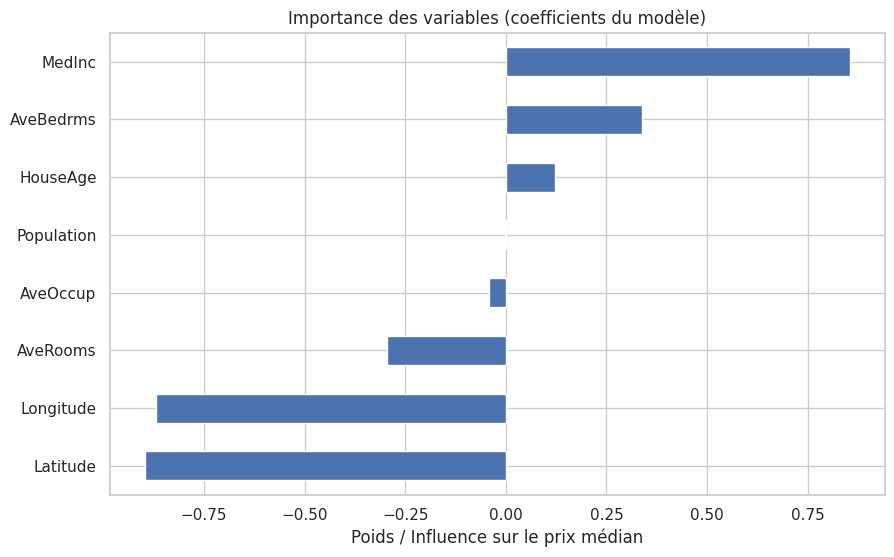

In [15]:
# Afficher lâ€™importance des variables (coefficients du modÃ¨le)
import pandas as pd
import matplotlib.pyplot as plt

# RÃ©cupÃ©rer les coefficients du modÃ¨le
feature_importance = pd.Series(best_model_final.coef_, index=X.columns).sort_values()

# Affichage sous forme de barres horizontales
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.title("Importance des variables (coefficients du modÃ¨le)")
plt.xlabel("Poids / Influence sur le prix mÃ©dian")
plt.grid(True)
plt.show()
